In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
df = pd.read_csv("heart_study.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
##What is our target variable: TenYearCHD
##Is this a classification or regression problem? classification problem as we are trying to predict a categorical val

In [6]:
##dropping the education column as it doesnt relate to heart disease
df.drop(['education'],axis = 1, inplace = True)

In [11]:
df.rename(columns = {'male':'sex_male'},inplace = True)

In [12]:
df.head()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex_male         4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 530.0 KB


In [22]:
df.isnull().sum() > 0.5*4240

sex_male           False
age                False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [23]:
###since no columns have more than 50% of missing data we will mot drop any columns rather we wil try to fill them 

In [24]:
df.isnull().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")

In [26]:
imputer.fit(df)

SimpleImputer(strategy='median')

In [28]:
X = imputer.transform(df)
df = pd.DataFrame(X, columns=df.columns)

In [29]:
df.info()
##all missing values are handled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex_male         4240 non-null   float64
 1   age              4240 non-null   float64
 2   currentSmoker    4240 non-null   float64
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   float64
 6   prevalentHyp     4240 non-null   float64
 7   diabetes         4240 non-null   float64
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   float64
dtypes: float64(15)
memory usage: 497.0 KB


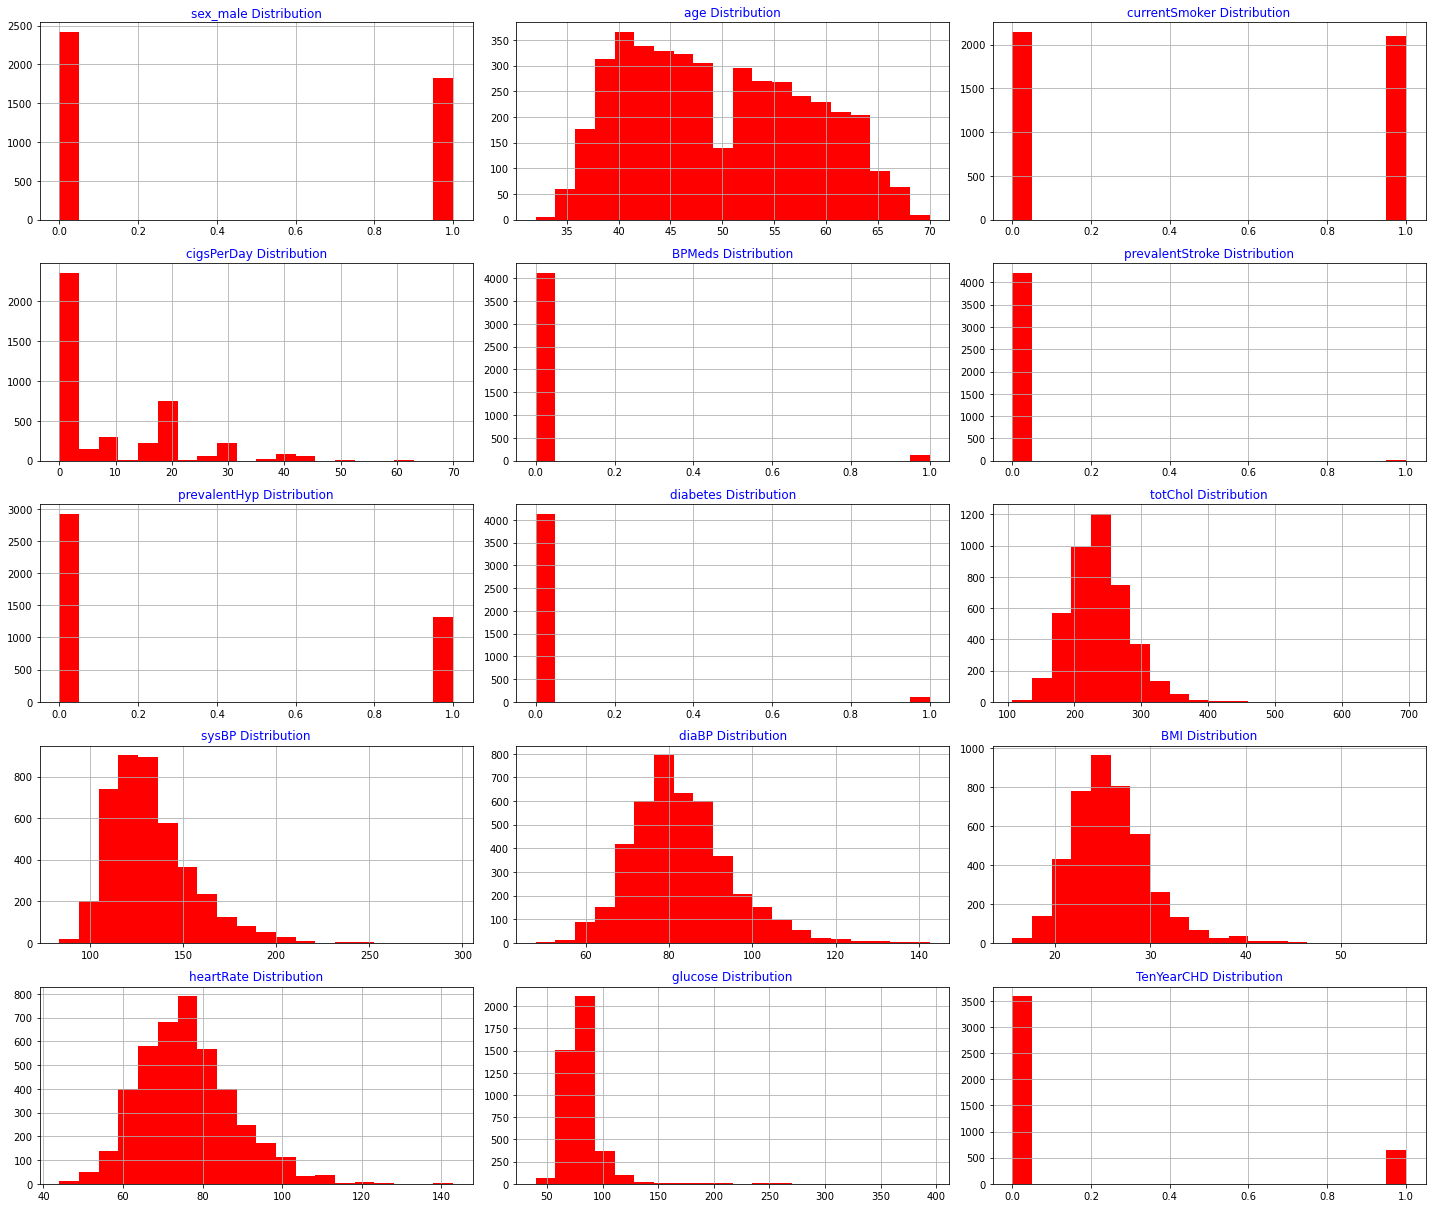

In [73]:
def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+" Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)

In [ ]:
##some graphs in the above plot only have 2 bars at 0 or obe because they are graphs of categorical attributes
#whereas the other graphs are of attributes which have continous values

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

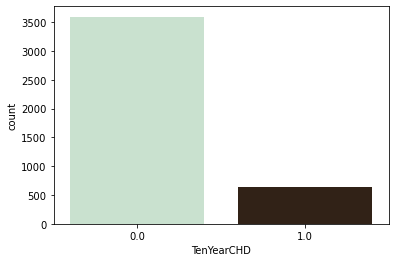

In [38]:
sns.countplot(data = df, x = 'TenYearCHD', palette = 'ch:25')

In [33]:
##acc to the countplot number of ppl who dont have CHD are just above 3.5k and ppl who have are arounf 600
##to get the exact number we can use .value_counts() method
df['TenYearCHD'].value_counts()

0.0    3596
1.0     644
Name: TenYearCHD, dtype: int64

In [39]:
df.head()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TenYearCHD',axis=1), 
                                                    df['TenYearCHD'], test_size=0.30, 
                                                    random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/jasleengill/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
##CONVERGENCE WARNING
###convergence warning is shown if the data isnt normalised or it is highky correlatexd or the algorithm 
#is not being given enough time to converge ie number of iterations are less

In [44]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,1.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,1.0,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,1.0,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [45]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = df_constant.columns[:-1]
model = sm.Logit(df.TenYearCHD, df_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378444
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4225
Method:                           MLE   Df Model:                           14
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.1116
Time:                        18:33:49   Log-Likelihood:                -1604.6
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 2.948e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1688      0.644    -12.689      0.000      -9.431      -6.907
sex_male            0.5029      0.100      5.010      0.000       0.306       0.700
age                 0.0624      0.006     10.112      0.000       0.050       0.074
currentSmoker       0.0144      0.143      0.101      0.919      -0.266       0.294
cigsPerDay          0.0214      0.006      3.793      0.000       0.010       0.032
BPMeds              0.2422      0.220      1.100      0.271      -0.189       0.674
prevalentStroke     0.9656      0.441      2.188      0.029       0.101       1.831
prevalentHyp        0.2300      0.128      1.790      0.073      -0.022       0.482
diabetes            0.1885      0.294      0.641      0.522      -0.388       0.765
totChol             0.0018      0.001      1.776      0.076      -0.000       0.004
sysBP               0.0142      0.004      4.022      0.000       0.007       0.021
diaBP              -0.0030      0.006     -0.501      0.617      -0.015       0.009
BMI                 0.0036      0.012      0.304      0.761      -0.019       0.027
heartRate          -0.0014      0.004     -0.372      0.710      -0.009       0.006
glucose             0.0067      0.002      3.134      0.002       0.003       0.011
===================================================================================
"""

In [46]:
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(df_constant, df.TenYearCHD, cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.1091
Time:                        18:33:59   Log-Likelihood:                -1609.1
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 5.270e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4642      0.389    -21.747      0.000      -9.227      -7.701
sex_male            0.4828      0.097      4.966      0.000       0.292       0.673
age                 0.0648      0.006     10.937      0.000       0.053       0.076
cigsPerDay          0.0216      0.004      5.630      0.000       0.014       0.029
prevalentStroke     1.0447      0.436      2.395      0.017       0.190       1.900
sysBP               0.0171      0.002      8.524      0.000       0.013       0.021
glucose             0.0076      0.002      4.662      0.000       0.004       0.011
===================================================================================
"""

In [47]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000098       0.000452    0.000211   0.000
sex_male             1.339436       1.960696    1.620564   0.000
age                  1.054621       1.079399    1.066938   0.000
cigsPerDay           1.014207       1.029606    1.021877   0.000
prevalentStroke      1.208851       6.684146    2.842559   0.017
sysBP                1.013223       1.021203    1.017205   0.000
glucose              1.004410       1.010843    1.007622   0.000


In [54]:
df_new = df_constant[["const","sex_male","age","cigsPerDay","prevalentStroke","sysBP","glucose"]]

In [58]:
df_new = df_new.assign(TenYearCHD = df['TenYearCHD'])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('TenYearCHD',axis=1), 
                                                    df_new['TenYearCHD'], test_size=0.30, 
                                                    random_state=101)

In [60]:
logmodel.fit(X_train,y_train)

/Users/jasleengill/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
predictions = logmodel.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix = (confusion_matrix(y_test,predictions))
print(confusion_matrix)

[[1073   12]
 [ 171   16]]


In [69]:
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0]

In [70]:
# Calculating accuracy using confusion matrix
accuracy = (TP + TN) / (TP + FP + TN + FN)
print("Accuracy:", accuracy)

Accuracy: 0.8561320754716981


In [71]:
# Calculating precision using confusion matrix
precision = TP / (TP + FP)
print("Precision:", precision)

Precision: 0.5714285714285714


In [72]:
# Calculating recall using confusion matrix
recall = TP / (TP + FN)
print("Recall:", recall)

Recall: 0.0855614973262032


In [ ]:
###Q.8 a : 
#precision means the number of true positives divided by the number of positive predictions
#high precision means that the model is good at identifying positive cases but doesnt mean that it is also good at 
#identifying the negative cases
#Recall is a measure of the proportion of actual positive cases that were correctly predicted.
####in the case of prediction of heart disease it is more importnat to have high recall as we dont weant to miss
#any cases of heart disease